In [1]:
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np

import pickle

with open('/Users/jmdunca2/do-dem/result_file_dict_new.pickle', 'rb') as f:
    dictz = pickle.load(f)



#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import all_nu_analysis as ana


In [2]:
for k in dictz.keys():
    if k == 'all regions':
        continue
    print(k, len(dictz[k]['quiet files all-inst']))

01-sep-15 region_0 8
02-sep-15 region_0 6
02-sep-15 region_1 4
19-feb-16 region_0 10
22-apr-16_1 region_0 0
22-apr-16_2 region_0 10
26-jul-16_1 region_0 2
26-jul-16_1 region_1 1
27-jul-16_1 region_0 24
27-jul-16_1 region_1 0
26-jul-16_2 region_0 1
11-sep-17 region_0 164
12-sep-17 region_0 66
12-sep-17 region_1 7
13-sep-17 region_0 9
13-sep-17 region_1 4
10-oct-17 region_0 10
10-oct-17 region_1 2
29-may-18_1 region_0 37
29-may-18_2 region_0 2
29-may-18_2 region_1 0
09-sep-18 region_0 9
10-sep-18 region_0 5
12-apr-19 region_0 69
13-apr-19 region_0 95
29-jan-20 region_0 13
06-jun-20 region_0 9
07-jun-20 region_0 15
08-jun-20 region_0 9
09-jun-20 region_0 0
08-jan-21 region_0 4
20-jan-21 region_0 2
29-apr-21 region_0 26
03-may-21_1 region_0 6
03-may-21_2 region_0 3
07-may-21 region_0 114
20-jul-21 region_0 33
20-jul-21 region_1 118
30-jul-21_1 region_0 1
30-jul-21_1 region_1 1
30-jul-21_2 region_0 1


In [3]:
samesames = [
    ['02-sep-15 region_0', '01-sep-15 region_0'],
    ['02-sep-15 region_1'],
    ['19-feb-16 region_0'],
    ['22-apr-16_2 region_0'],
    ['27-jul-16_1 region_0', '26-jul-16_1 region_0'],
    ['27-jul-16_1 region_1', '26-jul-16_1 region_1'],
    ['26-jul-16_2 region_0'],
    ['11-sep-17 region_0'],
    ['13-sep-17 region_0', '12-sep-17 region_0'],
    ['13-sep-17 region_1', '12-sep-17 region_1'],
    ['10-oct-17 region_0'],
    ['10-oct-17 region_1'],
    ['29-may-18_1 region_0'],
    ['29-may-18_2 region_0'],
    ['29-may-18_2 region_1'],
    ['10-sep-18 region_0', '09-sep-18 region_0'],
    ['13-apr-19 region_0', '12-apr-19 region_0'],
    ['29-jan-20 region_0'],
    ['09-jun-20 region_0', '08-jun-20 region_0', '07-jun-20 region_0', '06-jun-20 region_0'],
    ['08-jan-21 region_0'],
    ['20-jan-21 region_0'],
    ['29-apr-21 region_0'], 
    ['03-may-21_1 region_0'],
    ['03-may-21_2 region_0'],
    ['07-may-21 region_0'],
    ['20-jul-21 region_0'],
    ['20-jul-21 region_1'],
    ['30-jul-21_1 region_0'],
    ['30-jul-21_1 region_1'],
    ['30-jul-21_2 region_0']
]
    
print(len(samesames))
    

30


In [4]:
nones=[]

smsm_files = []

for s in samesames:
    files=[]
    for k in s:
        files.extend(dictz[k]['quiet files all-inst'])

    #print(files)
    #print('')
    if not files:
        nones.append(s)

    smsm_files.append(files)


print('For ', len(nones), ' regions out of ', len(samesames), ' no quiet times were found.')
print(nones)

For  1  regions out of  30  no quiet times were found.
[['29-may-18_2 region_1']]


In [5]:
accthreshold=95
smsm_goodfiles=[]
nones=[]

for i in range(0, len(smsm_files)):
    goodfiles=[]
    for f_ in smsm_files[i]:
        with open(f_, 'rb') as f:
            data = pickle.load(f)
        #print(data.keys())
        meanevsum, checkacc = ana.check_avg_rej(data['time_interval'], data['nustar_datapath'], threshold=accthreshold)
        if checkacc==True:
            goodfiles.append(f_)


    smsm_goodfiles.append(goodfiles)
    if not goodfiles:
        nones.append(samesames[i])
            

print('For ', len(nones), ' regions out of ', len(samesames), ' no quiet times were found.')
print(nones)

/Users/jmdunca2/do-dem//dodem/lightcurves.py:1028: RuntimeWarning: invalid value encountered in divide
  countrate=counts/lvt[:-1]
/Users/jmdunca2/do-dem//dodem/lightcurves.py:1028: RuntimeWarning: divide by zero encountered in divide
  countrate=counts/lvt[:-1]
/Users/jmdunca2/do-dem//dodem/all_nu_analysis.py:1949: RuntimeWarning: invalid value encountered in divide
  evsumA=acc_sample/(acc_sample+rej_sample)*100
/Users/jmdunca2/do-dem//dodem/all_nu_analysis.py:1961: RuntimeWarning: invalid value encountered in divide
  evsumB=acc_sample/(acc_sample+rej_sample)*100


For  2  regions out of  30  no quiet times were found.
[['29-may-18_2 region_1'], ['07-may-21 region_0']]


In [7]:
area_i = 100**2
area_m = np.pi*150**2
#print(area_i, area_m)
factor = area_m/area_i



allgood=0
region_above10s=[]
region_totaltime=[]
for i in range(0, len(smsm_files)):
    gf = smsm_goodfiles[i]
    allgood+=len(gf)

    vals = []
    above10s_ = []
    totaltime = 0
    for f_ in gf:
        with open(f_, 'rb') as f:
            data = pickle.load(f)
        #print(data.keys())
        time = data['time_interval']
        dur = (time[1]-time[0]).to(u.s).value
        above10s = data['above_10MK']
        #print(above10s[0], dur)
        # if samesames[i] == ['29-may-18_1 region_0']:
        #     if above10s[0]*8 > 1e22:
        #         print(f_)
        #         print(above10s[0])
        #         continue
        above10s_.append(above10s[0])
        vals.append([dur*above10s[0]])
        totaltime+=dur

    #print(totaltime)
    if vals:
        region_above10s.append([np.sum(vals)/totaltime*factor, np.min(above10s_)*factor, np.max(above10s_)*factor])
        region_totaltime.append(totaltime)

    else:
        region_above10s.append([0, 0, 0])
        region_totaltime.append(0)
    

order = np.argsort(np.array(region_above10s)[:,0])
regids = [samesames[i] for i in order]


labs=[]
for r in regids:
    lab=''
    first=0
    for ss in r:
        if first == 0:
            if ss[0] == '0':
                lab=lab+ss[1:-8]+'#'+str(int(ss[-1])+1)+' '
            else: 
                lab=lab+ss[0:-8]+'#'+str(int(ss[-1])+1)+' '
            first=1
        else:
            if ss[0] == '0':
                lab=ss[1:2]+','+lab
            else:    
                lab=ss[0:2]+','+lab

    labs.append(lab)

print('')
print(labs)

region_time_hr = np.array((region_totaltime*u.s).to(u.hr))
print(region_time_hr[order])


['29-may-18_2 #2 ', '7-may-21 #1 ', '10-oct-17 #2 ', '30-jul-21_1 #2 ', '30-jul-21_1 #1 ', '30-jul-21_2 #1 ', '26,27-jul-16_1 #2 ', '9,10-sep-18 #1 ', '3-may-21_2 #1 ', '8-jan-21 #1 ', '29-may-18_2 #1 ', '29-jan-20 #1 ', '22-apr-16_2 #1 ', '12,13-sep-17 #2 ', '26-jul-16_2 #1 ', '19-feb-16 #1 ', '1,2-sep-15 #1 ', '10-oct-17 #1 ', '20-jan-21 #1 ', '29-may-18_1 #1 ', '26,27-jul-16_1 #1 ', '2-sep-15 #2 ', '12,13-sep-17 #1 ', '6,7,8,9-jun-20 #1 ', '29-apr-21 #1 ', '3-may-21_1 #1 ', '20-jul-21 #1 ', '12,13-apr-19 #1 ', '20-jul-21 #2 ', '11-sep-17 #1 ']
[0.         0.         1.71805556 1.00833333 1.00833333 0.42083333
 0.41944444 2.3125     0.65972222 1.01805556 0.23333333 1.05138889
 1.10416667 1.20972222 0.16388889 1.55       2.125      2.05972222
 0.08194444 1.50555556 1.09027778 0.55694444 1.84583333 1.425
 1.25694444 0.26805556 2.86527778 4.07638889 3.17222222 2.1625    ]


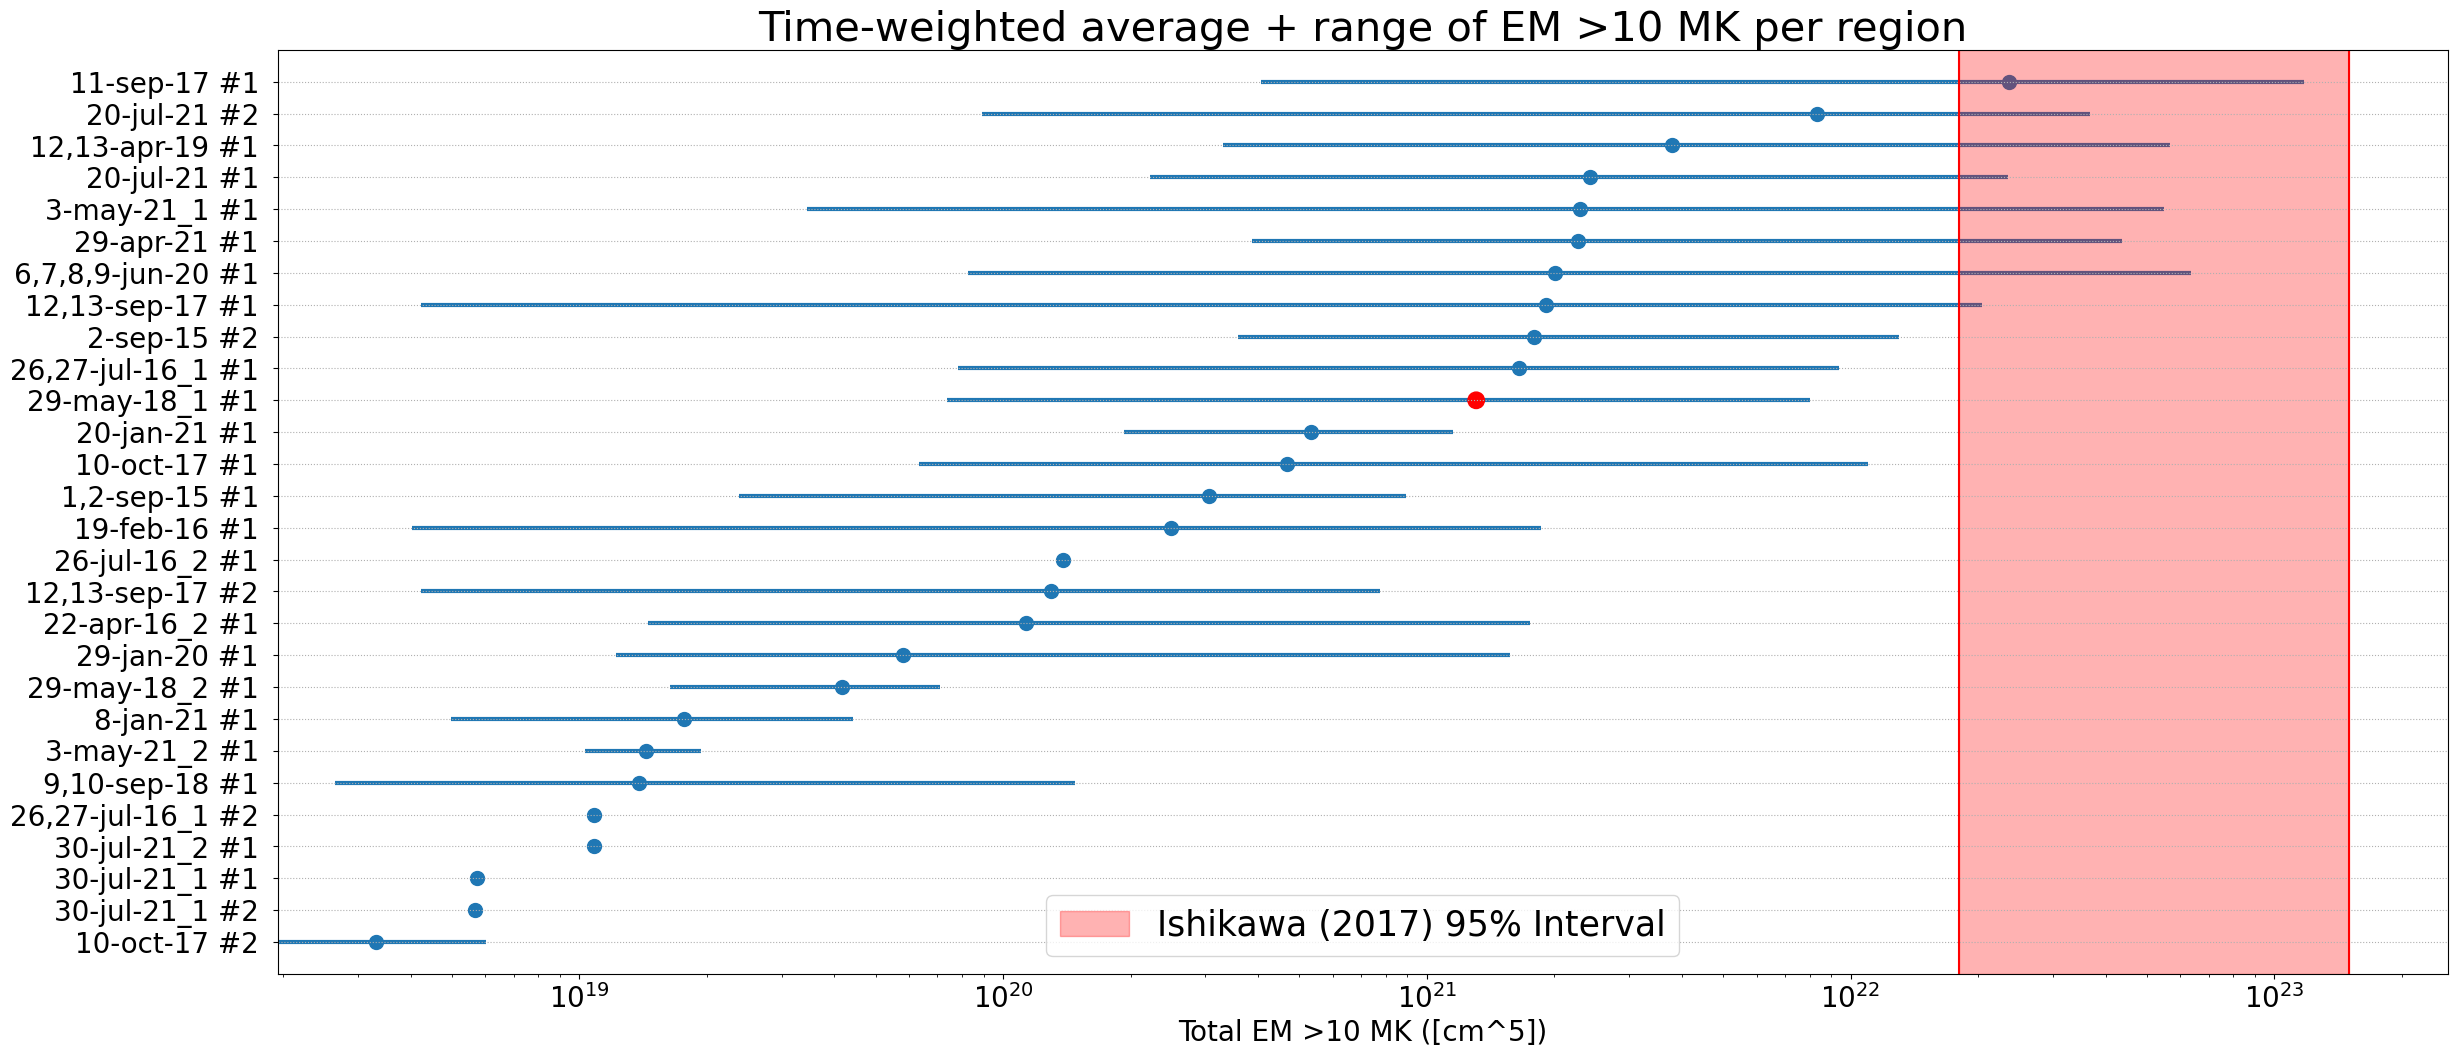

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(28,12))


xerr = [(np.array(region_above10s)[:,0][order] - np.array(region_above10s)[:,1][order]), 
        (np.array(region_above10s)[:,2][order] - np.array(region_above10s)[:,0][order])]

#print(xerr)


ax.errorbar(np.array(region_above10s)[:,0][order], np.arange(0, len(smsm_files), 1), 
            xerr=xerr,
           linestyle='', marker='o', zorder=0, linewidth=3, markersize=10)

ax.scatter(np.array(region_above10s)[:,0][order][19], np.arange(0, len(smsm_files), 1)[19],
            #xerr=xerr[0,25],
            linestyle='', marker='o', color='Red', linewidth=3, s=140)

fntsz=25
ax.set_xscale('log')
ax.axvline(1.8e22, color='Red')
ax.axvline(1.5e23, color='Red')
ax.axvspan(1.8e22, 1.5e23, alpha=0.3, color='Red', label='Ishikawa (2017) 95% Interval')
ax.set_yticks(np.arange(0, len(smsm_files))[2:])
ax.set_yticklabels(labels=labs[2:], fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Total EM >10 MK ([cm^5])', fontsize=20)
ax.grid(axis = 'y', linestyle='dotted')
ax.legend(loc='lower center', fontsize=fntsz)
ax.set_ylim([1,len(smsm_files)])
ax.set_title('Time-weighted average + range of EM >10 MK per region', fontsize=30)
print('')

plt.savefig('per_region_above10.png')

In [152]:
np.array(region_above10s)[:,0][order]

array([0.00000000e+00, 0.00000000e+00, 3.31649366e+18, 5.67242840e+18,
       5.73382390e+18, 1.08060367e+19, 1.08108140e+19, 1.38659625e+19,
       1.43645107e+19, 1.76288016e+19, 4.17542615e+19, 5.80355744e+19,
       1.13117688e+20, 1.29812672e+20, 1.38324500e+20, 2.49649920e+20,
       3.05693890e+20, 4.67824363e+20, 5.34070588e+20, 1.64886636e+21,
       1.78668257e+21, 1.78973805e+21, 1.91545867e+21, 2.00108185e+21,
       2.27701111e+21, 2.30184537e+21, 2.42634181e+21, 3.78722050e+21,
       8.31641301e+21, 2.36116110e+22])